In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

df = pd.read_csv(r"D:\Data Science\Assignments\MLR\ToyotaCorolla - MLR.csv")
print(df.head())
print("\n### number of unique values")
df.nunique()

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  

### number of unique values


Price         236
Age_08_04      77
KM           1263
Fuel_Type       3
HP             12
Automatic       2
cc             13
Doors           4
Cylinders       1
Gears           4
Weight         59
dtype: int64

**Dataset Description:**
The dataset consists of the following variables:
- Age_08_04: Age in years
- KM: Accumulated Kilometers on odometer
- FuelType: Fuel Type (Petrol, Diesel, CNG)
- HP: Horse Power
- Automatic: Automatic ( (Yes=1, No=0)
- CC: Cylinder Volume in cubic centimeters
- Doors: Number of doors
- Cylinders: Number of cylinders
- Gears: Number of Gears
- Weight: Weight in Kilograms
- Price: its target variable


In [3]:
# Rename columns to match the document description for clarity
# The CSV columns 'Age_08_04' and 'cc' correspond to 'Age' and 'CC' in the document.
df.rename(columns={'Age_08_04': 'Age', 'cc': 'CC'}, inplace=True)

# Cylinder column has only one value so droping that column
columns_to_use = ['Price', 'Age', 'KM', 'HP', 'Automatic', 'Gears', 'CC', 'Doors', 'Weight', 'Fuel_Type' ]
df = df[columns_to_use]

print("### Data Head:")
print(df.head())

print("\n### Data Info:")
df.info()

print("\n### Summary Statistics:")
print(df.describe().T) 
# (df.describe().T) in this formula .T is used for Transpose 

print("\n### number of unique values")
df.nunique()

### Data Head:
   Price  Age     KM  HP  Automatic  Gears    CC  Doors  Weight Fuel_Type
0  13500   23  46986  90          0      5  2000      3    1165    Diesel
1  13750   23  72937  90          0      5  2000      3    1165    Diesel
2  13950   24  41711  90          0      5  2000      3    1165    Diesel
3  14950   26  48000  90          0      5  2000      3    1165    Diesel
4  13750   30  38500  90          0      5  2000      3    1170    Diesel

### Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   HP         1436 non-null   int64 
 4   Automatic  1436 non-null   int64 
 5   Gears      1436 non-null   int64 
 6   CC         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Weight     1436 non-nul

Price         236
Age            77
KM           1263
HP             12
Automatic       2
Gears           4
CC             13
Doors           4
Weight         59
Fuel_Type       3
dtype: int64

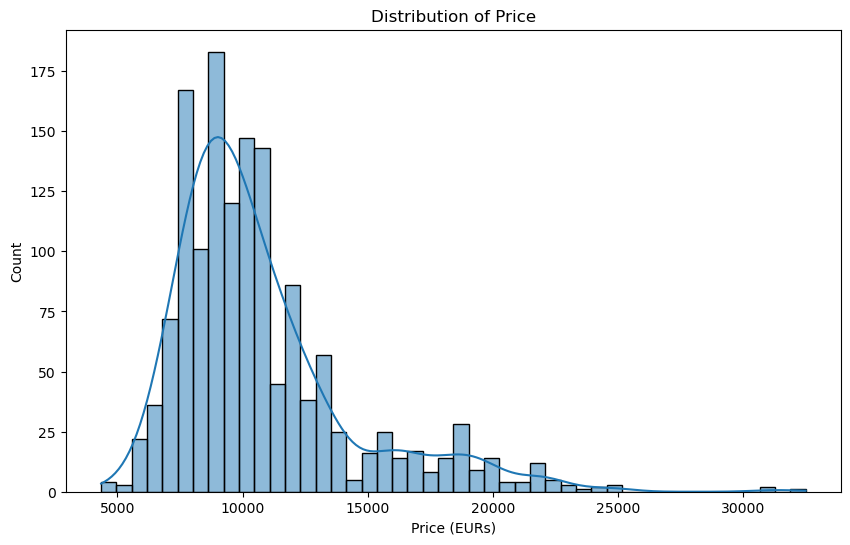

In [4]:
# Distribution of the Target Variable (Price)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price (EURs)')
plt.show()


In [5]:
df

,Price,Age,KM,HP,Automatic,Gears,CC,Doors,Weight,Fuel_Type
0,13500,23,46986,90,0,5,2000,3,1165,Diesel
1,13750,23,72937,90,0,5,2000,3,1165,Diesel
2,13950,24,41711,90,0,5,2000,3,1165,Diesel
3,14950,26,48000,90,0,5,2000,3,1165,Diesel
4,13750,30,38500,90,0,5,2000,3,1170,Diesel
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,5,1300,3,1025,Petrol
1432,10845,72,19000,86,0,5,1300,3,1015,Petrol
1433,8500,71,17016,86,0,5,1300,3,1015,Petrol
1434,7250,70,16916,86,0,5,1300,3,1015,Petrol


In [6]:
# For building 1st model taking all the features and value from Fuel_Type column
# we are using one hot encoding for Fuel_Type column
Fuel=pd.get_dummies(df["Fuel_Type"]).astype(int) # With the help of astype() function i have converted boolean values to int
X_model1=df.drop(columns=['Price','Fuel_Type'],axis=1) # dropping Price column as it is Traget variable and Fuel_Type because it is categorical variable
X_model1=pd.concat([X_model1,Fuel],axis=1)
y_model1=df['Price']
X_model1.head()


,Age,KM,HP,Automatic,Gears,CC,Doors,Weight,CNG,Diesel,Petrol
0,23,46986,90,0,5,2000,3,1165,0,1,0
1,23,72937,90,0,5,2000,3,1165,0,1,0
2,24,41711,90,0,5,2000,3,1165,0,1,0
3,26,48000,90,0,5,2000,3,1165,0,1,0
4,30,38500,90,0,5,2000,3,1170,0,1,0


In [7]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(X_model1,y_model1,test_size=0.2,random_state=42)
model1=LinearRegression()
model1.fit(x1_train,y1_train)
y1_pred=model1.predict(x1_test)


In [8]:
pd.DataFrame([y1_pred,y1_test],['y1_pred','y1_test'] )

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
y1_pred,11137.154536,8974.973133,9283.27026,8951.974408,10082.315929,7959.326986,8656.437683,8254.87284,14063.403192,13099.957356,...,6374.692154,26351.370077,22686.735501,10217.759626,7217.390964,19192.104931,8011.827889,13519.165117,10720.331258,10638.634347
y1_test,10800.000000,9950.000000,7500.00000,9250.000000,9750.000000,9950.000000,9895.000000,6750.00000,13450.000000,12950.000000,...,6750.000000,12450.000000,24950.000000,9950.000000,5750.000000,21950.000000,8450.000000,12850.000000,6950.000000,8900.000000


In [9]:
print(f"Coefficients of determination for model1 is {r2_score(y1_test,y1_pred):.4f}")
print(f"Mean Squared error for model1 is {mean_squared_error(y1_test,y1_pred):,.4f}")

Coefficients of determination for model1 is 0.8349
Mean Squared error for model1 is 2,203,043.8231


## Model 2 

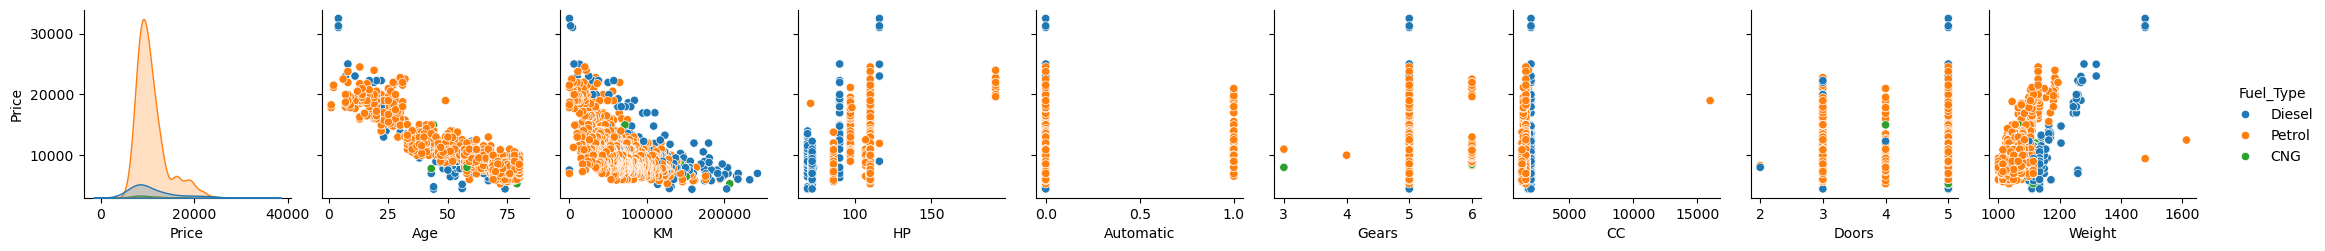

In [11]:
sns.pairplot(df,y_vars="Price",hue="Fuel_Type")

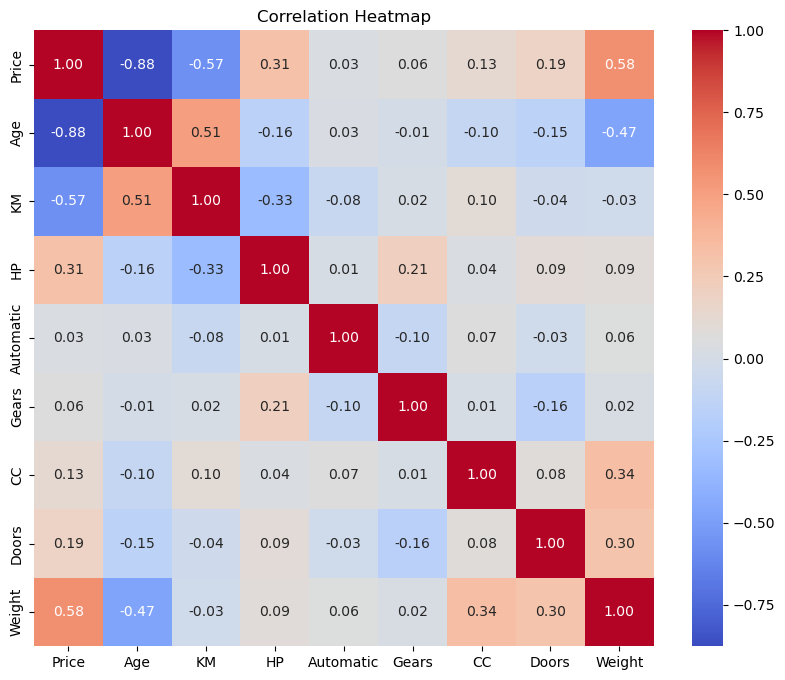

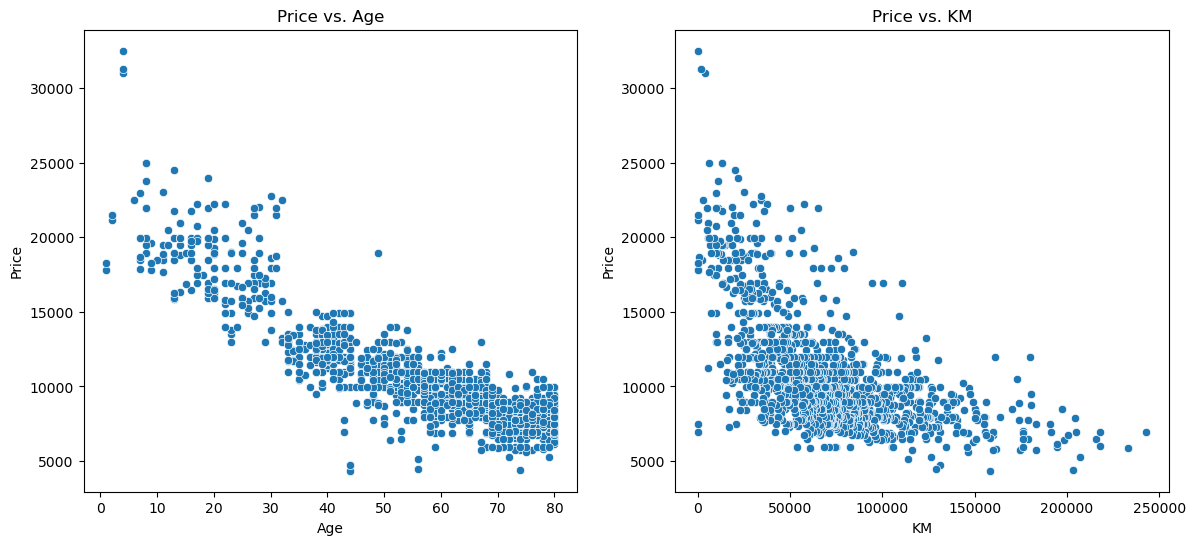

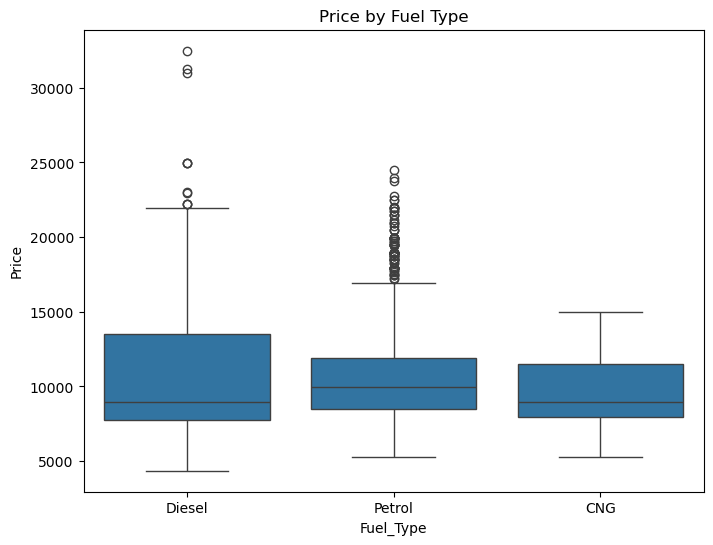

In [12]:

# Correlation Heatmap for Numerical Variables
plt.figure(figsize=(10, 8))
numerical_cols = df.select_dtypes(include=np.number).columns
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
# 
# Scatter plots of Price vs. Key Predictors
# Age and KM are often highly correlated with Price (negative correlation expected)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Price', data=df)
plt.title('Price vs. Age')

plt.subplot(1, 2, 2)
sns.scatterplot(x='KM', y='Price', data=df)
plt.title('Price vs. KM')
plt.show()
# 
# Box plot for Categorical Variable (Fuel_Type)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title('Price by Fuel Type')
plt.show()


In [13]:
df

,Price,Age,KM,HP,Automatic,Gears,CC,Doors,Weight,Fuel_Type
0,13500,23,46986,90,0,5,2000,3,1165,Diesel
1,13750,23,72937,90,0,5,2000,3,1165,Diesel
2,13950,24,41711,90,0,5,2000,3,1165,Diesel
3,14950,26,48000,90,0,5,2000,3,1165,Diesel
4,13750,30,38500,90,0,5,2000,3,1170,Diesel
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,5,1300,3,1025,Petrol
1432,10845,72,19000,86,0,5,1300,3,1015,Petrol
1433,8500,71,17016,86,0,5,1300,3,1015,Petrol
1434,7250,70,16916,86,0,5,1300,3,1015,Petrol


In [14]:
# WE can also use ols(Ordinary Least Square) Method, as used in the below code for multi linear regression model building. 
# This is used for Inference (Statistical Testing) Detailed statistical reports like 
# p-values, t-statistics, confidence intervals, $R^2$, Adj. $R^2$, F-test.
# Focus on the significance (p-values) and reliability (standard errors) of individual feature coefficients.
# When OLS method is used for Multiple linear Regression Categorical string type variable is automatically  
import statsmodels.formula.api as smf
mlr1model=smf.ols("Price~Age+KM+HP+Doors+Weight+Automatic+CC+Gears+Fuel_Type",data=df).fit()
mlr1model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     912.3
Date:                Tue, 23 Dec 2025   Prob (F-statistic):               0.00
Time:                        07:16:53   Log-Likelihood:                -12369.
No. Observations:                1436   AIC:                         2.476e+04
Df Residuals:                    1425   BIC:                         2.482e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -9861.0292   1529.450     -6.447      0.000   -1.29e+04   -6860.814
Fuel_Type[T.Diesel]   554.0543    382.722      1.448      0.148    -196.704    1304.813
Fuel_Type[T.Petrol]  1144.0966    338.650      3.378      0.001     479.792    1808.402
Age                  -123.7771      2.631    -47.043      0.000    -128.938    -118.616
KM                     -0.0175      0.001    -13.154      0.000      -0.020      -0.015
HP                     23.5270      3.575      6.581      0.000      16.515      30.539
Doors                 -30.3567     40.908     -0.742      0.458    -110.603      49.890
Weight                 20.8174      1.218     17.090      0.000      18.428      23.207
Automatic             300.2592    161.026      1.865      0.062     -15.614     616.133
CC                     -0.0556      0.092     -0.604      0.546      -0.236       0.125
Gears                 622.7990    198.026      3.145      0.002     234.346    1011.252
==============================================================================
Omnibus:                      265.277   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2773.279
Skew:                          -0.532   Prob(JB):                         0.00
Kurtosis:                       9.724   Cond. No.                     3.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### t-value and p-value importance

- t-value and p-value work together to tell us: "Is this feature actually helping predict the price, or is it just noise?"
- The t-value: "The Signal-to-Noise Ratio", it is strength of the signal (Coefficient ÷ Error)
- The p-value: "The Probability of being Wrong/Fluke" It is the Evidence (Probability that the signal is just noise)
- Rule of Thumb: We may only want large t-value (typically $> 2$ or $< -2$) and a small p-value (typically $< 0.05$)
- Higher t-value and and lower p-value $ < 0.05 $ are the key features for the model training
- If it is not satisfying the above requirement then that means 


In [16]:
# So, There were exactly four features for which p-value is > 0.05 and t-value is around -2 to 2

# Doors
## t-value is -0.742
## p-value is 0.458
## This is insignificant feature

# CC
## t-value is -0.604
## p-value is 0.546
## This is the weekest and insignificant feature

# Fuel_Type[T.Diesel]
## t-value is 1.448
## p-value is 0.148
## This is also insignificant feature

# Automatic
## t-value is 1.865
## p-value is 0.062
## This is "Marginally Significant." While it is above the standard 0.05 cutoff, it is very close.

In [17]:
## Building 2nd model using only weak fields to see the R-squared value
## This would be the worst model
mlr2model=smf.ols("Price~Doors+Automatic+CC+Gears+Fuel_Type",data=df).fit()
mlr2model.rsquared

0.058664636406262294

In [18]:
# Fuel_Type[T.Petrol], Age, KM, HP, Weight and Gears are the key features for our model 


In [19]:
Fuel_type=pd.get_dummies(df["Fuel_Type"],drop_first=True).astype(int)
df3=df.drop(["Price","Fuel_Type","CC","Doors"],axis=1) # dropping weak fields and target variable
df3=pd.concat([df3,Fuel_type],axis=1)
y3=df["Price"]

In [20]:
x3_train,x3_test,y3_train,y3_test=train_test_split(df3,y3,test_size=0.2,random_state=42)
model3=LinearRegression()
model3.fit(x3_train,y3_train)
y3_pred=model3.predict(x3_test)
pd.DataFrame([y3_pred,y3_test],['y3_pred','y3_test'] )

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
y3_pred,11100.958078,8913.820224,9289.80606,9000.907392,10131.62881,7992.493264,8666.962233,8201.414918,14117.34187,13152.087081,...,6323.221891,25998.22739,22662.043746,10175.632479,7223.617897,19216.321483,7972.906333,13570.87775,10751.715883,10591.045282
y3_test,10800.000000,9950.000000,7500.00000,9250.000000,9750.00000,9950.000000,9895.000000,6750.000000,13450.00000,12950.000000,...,6750.000000,12450.00000,24950.000000,9950.000000,5750.000000,21950.000000,8450.000000,12850.00000,6950.000000,8900.000000


In [119]:
print("Using LinearRegresion() of sklearn.linear_model\n")
print(f"Coefficients of determination for model3 is {r2_score(y3_test,y3_pred):.4f}")
print(f"Mean Squared error for model1 is {mean_squared_error(y3_test,y3_pred):,.4f}\n")

model3_coef_mapping={name:round(coef,2) for name, coef in zip(df3.columns, model3.coef_)}   
model3_coef=pd.DataFrame(model3_coef_mapping,index=["Coefficients"])
model3_coef

Using LinearRegresion() of sklearn.linear_model

Coefficients of determination for model3 is 0.8360
Mean Squared error for model1 is 2,187,977.0204



,Age,KM,HP,Automatic,Gears,Weight,Diesel,Petrol
Coefficients,-120.93,-0.02,14.42,170.98,607.56,25.14,-24.09,1336.68


In [22]:
print("using sm.OLS\n")

# Add the constant to your features
df3_with_const = sm.add_constant(df3)

# Run the model
mlr3 = sm.OLS(y3, df3_with_const).fit()

print(f"Model3 R-squared using sm.OLS : {mlr3.rsquared:.4f}")

using sm.OLS

Model3 R-squared using sm.OLS : 0.8648


The final optimized model (Model 3), developed by removing statistically insignificant features ($p > 0.05$), achieved a Goodness of Fit ($R^2$) of 0.8648 using the sm.OLS method.While this value represents a high explanatory power for the training dataset, the more critical finding is that the model's Testing $R^2$ (0.8360) remains strong. This proximity between the training fit and testing prediction confirms that the model is well-balanced: it is complex enough to capture the major drivers of Toyota Corolla prices (Age, Weight, HP) but simple enough to avoid overfitting to noise. By pruning the 'weak' fields, we have produced a parsimonious model that is both statistically significant and highly reliable for real-world price prediction.

### Lasso and Ridge Regression model
- Lasso (Least Absolute Shrinkage and Selection Operator), it is a "Smart MLR."
- Lasso adds a penalty (L1 penalty) to the model. If a feature is "weak" or "noisy" (like CC or Doors), Lasso will push its coefficient exactly to zero. It effectively "deletes" the features that don't help.
- By penalizing large coefficients, Lasso forces the model to stay simple. Simple models almost always generalize better to new data
- Lasso will typically pick the stronger one of the two and set the other to zero, solving the multicollinearity problem automatically
- $ Ridge $ regression model uses L2 penalty Ridge adds a "Penalty" to the standard regression equation based on the square of the coefficients
- Instead of picking one and dropping the other (like Lasso), Ridge shrinks both coefficients toward each other. It stabilizes the model by ensuring the "influence" is shared fairly between correlated variables

In [138]:
# Drop constant column and original Fuel_Type
# Using all other columns as features
X_full=df.drop(["Fuel_Type","Price"],axis=1)
X_full=pd.concat([X_full,Fuel_type],axis=1)
Y_full=df["Price"]

# Split the data
X_train,X_test,Y_train,Y_test=train_test_split(X_full,Y_full,test_size=0.2,random_state=42)

# Standarize (Mandatory for Lasso or Ridge Regression)
Scaler=StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)


# Test different alpha values

alphas = [1, 10, 50, 100, 200, 500]
feature_names = X_full.columns
lasso_results = []

for a in alphas:
    lasso = Lasso(alpha=a, random_state=42)
    lasso.fit(X_train_scaled, Y_train)
    y_pred = lasso.predict(X_test_scaled)
    r2 = r2_score(Y_test, y_pred)
    
    # Store coefficients
    coef_dict = {'Alpha': a, 'R2_Test': round(r2, 4)}
    for name, coef in zip(feature_names, lasso.coef_):
        coef_dict[name] = round(coef, 2)
    lasso_results.append(coef_dict)

# Display results
lasso_results_df = pd.DataFrame(lasso_results)
print("### Lasso Coefficients across different Alphas ###")
print(lasso_results_df.T)

### Lasso Coefficients across different Alphas ###
                   0          1          2         3          4          5
Alpha         1.0000    10.0000    50.0000   100.000   200.0000   500.0000
R2_Test       0.8351     0.8371     0.8426     0.847     0.8459     0.8057
Age       -2267.0600 -2265.1800 -2252.7200 -2243.150 -2227.1900 -2189.5800
KM         -612.2200  -617.3900  -634.2000  -646.290  -623.6100  -415.4500
HP          209.4700   219.8500   252.3500   294.340   293.6600    87.4300
Automatic    33.7900    28.4400     2.2400     0.000     0.0000     0.0000
Gears       108.6200   102.1900    69.8900    23.390     0.0000     0.0000
CC          -12.9900    -2.3400    -0.0000    -0.000     0.0000     0.0000
Doors       -55.6600   -39.2100    -0.0000     0.000     0.0000     0.0000
Weight     1312.6600  1274.5100  1149.7300  1008.880   828.0300   561.6000
Diesel      -19.3400    -0.0000    -0.0000    -0.000    -0.0000    -0.0000
Petrol      456.4600   439.6200   307.0000   150.

$\alpha = 100$ gives the maximum $R^2$ score

- At $\alpha = 1$: The penalty is too low. The model is still trying to use "weak" variables like Doors and CC, which leads to slightly lower accuracy ($0.8351$) because of the noise they introduce.
- At $\alpha = 100$: This is your Optimal Model. It has successfully "silenced" the noise from Automatic, CC, Doors, and Diesel (setting them to $0.00$). By focusing only on the high-impact variables, it achieved its highest predictive power ($0.8470$).
- At $\alpha = 500$: The penalty is now too high. The model is starting to shrink even the important variables like KM and HP too much. This causes the accuracy to drop ($0.8057$), leading to Underfitting.

In [143]:
alphas = [1, 10, 50, 100, 200, 500]
feature_names = X_full.columns
ridge_results = []

for a in alphas:
    ridge = Ridge(alpha=a, random_state=42)
    ridge.fit(X_train_scaled, Y_train)
    y_pred = ridge.predict(X_test_scaled)
    r2 = r2_score(Y_test, y_pred)
    
    # Store coefficients
    coef_dict = {'Alpha': a, 'R2_Test': round(r2, 4)}
    for name, coef in zip(feature_names, ridge.coef_):
        coef_dict[name] = round(coef, 2)
    ridge_results.append(coef_dict)

# Display results
ridge_results_df = pd.DataFrame(ridge_results)
print("### Ridge Coefficients across different Alphas ###")
print(ridge_results_df.T)

### Ridge Coefficients across different Alphas ###
                  0          1          2          3          4          5
Alpha         1.000    10.0000    50.0000   100.0000   200.0000   500.0000
R2_Test       0.835     0.8363     0.8401     0.8417     0.8394     0.8156
Age       -2265.000 -2244.7400 -2161.5800 -2070.2000 -1918.0000 -1601.5900
KM         -613.360  -627.8800  -678.3700  -719.7700  -762.6000  -769.9100
HP          209.510   219.5900   256.1000   286.7700   320.2600   342.7600
Automatic    34.560    35.9600    40.3000    42.8500    43.8000    40.1100
Gears       109.440   110.2200   111.8600   111.8100   109.1200    97.0500
CC          -14.020   -12.7500    -7.3200    -0.6200    12.1000    40.0900
Doors       -56.640   -49.4800   -22.9800     1.6100    35.0000    83.7300
Weight     1314.480  1294.2500  1220.3400  1153.2500  1061.8600   904.2700
Diesel      -22.630   -28.8700   -34.5900   -26.6800    -7.8500    21.5500
Petrol      453.930   420.0600   314.9800   236.6

Optimal Alpha for Ridge: $\alpha = 100$ is also the "peak" for Ridge, giving an $R^2$ of 0.8417.

The Difference: While Lasso reached 0.8470, Ridge reached 0.8417. 

In this specific project, Lasso is slightly more accurate because it's better at completely removing the noise from variables like CC and Doors.

In [155]:
model3_map=dict(zip(df3.columns, model3.coef_))

lasso_100_data = next(item for item in lasso_results if item["Alpha"] == 100)
ridge_100_data = next(item for item in ridge_results if item["Alpha"] == 100)


coef_comparison = pd.DataFrame({
    'Feature': feature_names,
    'Model 3 (MLR)': [model3_map.get(f, 0) for f in feature_names],
    'Lasso (Alpha=100)': [lasso_100_data.get(f,0) for f in feature_names],
    'Ridge (Alpha=100)': [ridge_100_data.get(f,0) for f in feature_names]
})

# Round for readability
coef_comparison = coef_comparison.round(2)

# Sort by the most impactful variables (based on Model 3)
coef_comparison = coef_comparison.sort_values(by='Model 3 (MLR)', ascending=False)

print(coef_comparison)

     Feature  Model 3 (MLR)  Lasso (Alpha=100)  Ridge (Alpha=100)
9     Petrol        1336.68             150.23             236.63
4      Gears         607.56              23.39             111.81
3  Automatic         170.98               0.00              42.85
7     Weight          25.14            1008.88            1153.25
2         HP          14.42             294.34             286.77
5         CC           0.00              -0.00              -0.62
6      Doors           0.00               0.00               1.61
1         KM          -0.02            -646.29            -719.77
8     Diesel         -24.09              -0.00             -26.68
0        Age        -120.93           -2243.15           -2070.20


In [99]:
df3.columns

Index(['Age', 'KM', 'HP', 'Automatic', 'Gears', 'Weight', 'Diesel', 'Petrol'], dtype='object')